In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
import random
from pathlib import Path

import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchaudio

import promonet

### Perceptual loudness analysis

In [3]:
# Get all relevant evaluation files
original_audio_files = sorted(list((promonet.EVAL_DIR / 'subjective' / 'original').glob('vctk-*-original-100.wav')))
original_loudness_files = [promonet.EVAL_DIR / 'objective' / 'original' / f'{file.stem}-loudness.pt' for file in original_audio_files]
reconstructed_audio_files = sorted(list((promonet.EVAL_DIR / 'subjective' / 'promonet').glob('vctk-*-original-100.wav')))
reconstructed_loudness_files = [promonet.EVAL_DIR / 'objective' / 'promonet' / f'{file.stem}-loudness.pt' for file in original_audio_files]
ratio_050_audio_files = [promonet.EVAL_DIR / 'subjective' / 'promonet' / file.name.replace('original-100', 'loudness-050') for file in original_audio_files]
ratio_050_loudness_files = [promonet.EVAL_DIR / 'objective' / 'promonet' / f'{file.stem.replace("original-100", "loudness-050")}-loudness.pt' for file in original_audio_files]
ratio_200_audio_files = [promonet.EVAL_DIR / 'subjective' / 'promonet' / file.name.replace('original-100', 'loudness-200') for file in original_audio_files]
ratio_200_loudness_files = [promonet.EVAL_DIR / 'objective' / 'promonet' / f'{file.stem.replace("original-100", "loudness-200")}-loudness.pt' for file in original_audio_files]
framewise_050_audio_files = [promonet.EVAL_DIR / 'subjective' / 'promonet' / file.name.replace('original-100', 'scaled-050') for file in original_audio_files]
framewise_050_loudness_files = [promonet.EVAL_DIR / 'objective' / 'promonet' / f'{file.stem.replace("original-100", "scaled-050")}-loudness.pt' for file in original_audio_files]
framewise_200_audio_files = [promonet.EVAL_DIR / 'subjective' / 'promonet' / file.name.replace('original-100', 'scaled-200') for file in original_audio_files]
framewise_200_loudness_files = [promonet.EVAL_DIR / 'objective' / 'promonet' / f'{file.stem.replace("original-100", "scaled-200")}-loudness.pt' for file in original_audio_files]
# ablate_050_audio_files = [promonet.EVAL_DIR / 'subjective' / 'ablate-augment' / file.name.replace('original-100', 'scaled-050') for file in original_audio_files]
# ablate_050_loudness_files = [promonet.EVAL_DIR / 'objective' / 'ablate-augment' / f'{file.stem.replace("original-100", "scaled-050")}-loudness.pt' for file in original_audio_files]
# ablate_200_audio_files = [promonet.EVAL_DIR / 'subjective' / 'ablate-augment' / file.name.replace('original-100', 'scaled-200') for file in original_audio_files]
# ablate_200_loudness_files = [promonet.EVAL_DIR / 'objective' / 'ablate-augment' / f'{file.stem.replace("original-100", "scaled-200")}-loudness.pt' for file in original_audio_files]

In [55]:
# Get random example
index = random.randint(0, len(original_audio_files))

In [56]:
# Load files
original_audio = promonet.load.audio(original_audio_files[index])
original_loudness = promonet.loudness.band_average(torch.load(original_loudness_files[index]), 1)
reconstructed_audio = promonet.load.audio(reconstructed_audio_files[index])
reconstructed_loudness = promonet.loudness.band_average(torch.load(reconstructed_loudness_files[index]), 1)
ratio_050_audio = promonet.load.audio(ratio_050_audio_files[index])
ratio_050_loudness = promonet.loudness.band_average(torch.load(ratio_050_loudness_files[index]), 1)
ratio_200_audio = promonet.load.audio(ratio_200_audio_files[index])
ratio_200_loudness = promonet.loudness.band_average(torch.load(ratio_200_loudness_files[index]), 1)
framewise_050_audio = promonet.load.audio(framewise_050_audio_files[index])
framewise_050_loudness = promonet.loudness.band_average(torch.load(framewise_050_loudness_files[index]), 1)
framewise_200_audio = promonet.load.audio(framewise_200_audio_files[index])
framewise_200_loudness = promonet.loudness.band_average(torch.load(framewise_200_loudness_files[index]), 1)
# ablate_050_audio = promonet.load.audio(ablate_050_audio_files[index])
# ablate_050_loudness = promonet.loudness.band_average(torch.load(ablate_050_loudness_files[index]), 1)
# ablate_200_audio = promonet.load.audio(ablate_200_audio_files[index])
# ablate_200_loudness = promonet.loudness.band_average(torch.load(ablate_200_loudness_files[index]), 1)

In [57]:
# Listen
ipd.display(ipd.Audio(original_audio, rate=promonet.SAMPLE_RATE))
ipd.display(ipd.Audio(reconstructed_audio, rate=promonet.SAMPLE_RATE))
ipd.display(ipd.Audio(ratio_050_audio, rate=promonet.SAMPLE_RATE))
ipd.display(ipd.Audio(ratio_200_audio, rate=promonet.SAMPLE_RATE))
ipd.display(ipd.Audio(framewise_050_audio, rate=promonet.SAMPLE_RATE))
ipd.display(ipd.Audio(framewise_200_audio, rate=promonet.SAMPLE_RATE))
# ipd.display(ipd.Audio(ablate_050_audio, rate=promonet.SAMPLE_RATE))
# ipd.display(ipd.Audio(ablate_200_audio, rate=promonet.SAMPLE_RATE))

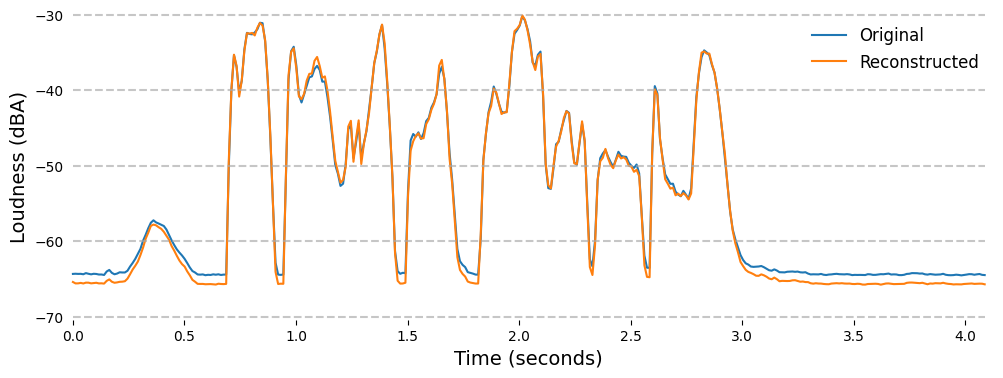

In [60]:
# Plot loudness
plt.figure(figsize=(12, 4))
times = np.linspace(
    0,
    promonet.convert.frames_to_seconds(original_loudness.shape[-1]),
    original_loudness.shape[-1])
plt.plot(times, original_loudness.squeeze(), label='Original')
plt.plot(times, reconstructed_loudness.squeeze(), label='Reconstructed')
# plt.plot(ratio_050_loudness.squeeze(), label=f'ratio_050 {ratio_050_loudness.mean():.03f}')
# plt.plot(ratio_200_loudness.squeeze(), label=f'ratio_200 {ratio_200_loudness.mean():.03f}')
# plt.plot(framewise_050_loudness.squeeze(), label=f'framewise_050 {framewise_050_loudness.mean():.03f}')
# plt.plot(framewise_200_loudness.squeeze(), label=f'framewise_200 {framewise_200_loudness.mean():.03f}')
# plt.plot(ablate_050_loudness.squeeze(), label=f'ablate_050 {ablate_050_loudness.mean():.03f}')
# plt.plot(ablate_200_loudness.squeeze(), label=f'ablate_200 {ablate_200_loudness.mean():.03f}')
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Loudness (dBA)', fontsize=14)
plt.margins(.01)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
yticks = [-70, -60, -50, -40, -30]
plt.yticks(yticks)
for tick in yticks:
    plt.hlines(tick, xmin=0., xmax=times[-1], color='#aaaa', linestyle='--')
plt.tick_params(
    axis='y',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False,
    pad=0,
    length=0)
plt.legend(frameon=False, fontsize=12)
plt.savefig('noise-floor.pdf', bbox_inches='tight', pad_inches=.1)
plt.savefig('noise-floor.png', bbox_inches='tight', pad_inches=.1, transparent=True)

In [ ]:
# Compute gain of all examples
reconstructed_gain = original_loudness - reconstructed_loudness
ratio_050_gain = original_loudness - ratio_050_loudness
ratio_200_gain = original_loudness - ratio_200_loudness
framewise_050_gain = original_loudness - framewise_050_loudness
framewise_200_gain = original_loudness - framewise_200_loudness
# ablate_050_gain = original_loudness - ablate_050_loudness
# ablate_200_gain = original_loudness - ablate_200_loudness
plt.figure(figsize=(12, 12))
plt.plot(reconstructed_gain.squeeze(), label='reconstructed')
plt.plot(ratio_050_gain.squeeze(), label='ratio_050')
plt.plot(ratio_200_gain.squeeze(), label='ratio_200')
plt.plot(framewise_050_gain.squeeze(), label='framewise_050')
plt.plot(framewise_200_gain.squeeze(), label='framewise_200')
# plt.plot(ablate_050_gain.squeeze(), label='ablate_050')
# plt.plot(ablate_200_gain.squeeze(), label='ablate_200')
plt.legend()

In [ ]:
# Normalize all predicted audio to same volume as original
reconstructed_norm = promonet.loudness.limit(promonet.loudness.shift(reconstructed_audio, reconstructed_gain))
ratio_050_norm = promonet.loudness.limit(promonet.loudness.shift(ratio_050_audio, ratio_050_gain))
ratio_200_norm = promonet.loudness.limit(promonet.loudness.shift(ratio_200_audio, ratio_200_gain))
framewise_050_norm = promonet.loudness.limit(promonet.loudness.shift(framewise_050_audio, framewise_050_gain))
framewise_200_norm = promonet.loudness.limit(promonet.loudness.shift(framewise_200_audio, framewise_200_gain))
# ablate_050_norm = promonet.loudness.limit(promonet.loudness.shift(ablate_050_audio, ablate_050_gain))
# ablate_200_norm = promonet.loudness.limit(promonet.loudness.shift(ablate_200_audio, ablate_200_gain))
ipd.display(ipd.Audio(original_audio, rate=promonet.SAMPLE_RATE))
ipd.display(ipd.Audio(reconstructed_norm, rate=promonet.SAMPLE_RATE))
ipd.display(ipd.Audio(ratio_050_norm, rate=promonet.SAMPLE_RATE))
ipd.display(ipd.Audio(ratio_200_norm, rate=promonet.SAMPLE_RATE))
ipd.display(ipd.Audio(framewise_050_norm, rate=promonet.SAMPLE_RATE))
ipd.display(ipd.Audio(framewise_200_norm, rate=promonet.SAMPLE_RATE))
# ipd.display(ipd.Audio(ablate_050_norm, rate=promonet.SAMPLE_RATE))
# ipd.display(ipd.Audio(ablate_200_norm, rate=promonet.SAMPLE_RATE))

In [ ]:
# Validate that the volume is the same
plt.figure(figsize=(12, 12))
validation_loudness = promonet.loudness.from_audio(original_audio).squeeze()
plt.plot(validation_loudness, label=f'validation {validation_loudness.mean():.03f}')
reconstructed_norm_loudness = promonet.loudness.from_audio(reconstructed_norm).squeeze()
plt.plot(reconstructed_norm_loudness, label=f'reconstructed_norm {reconstructed_norm_loudness.mean():.03f}')
# ratio_050_norm_loudness = promonet.loudness.from_audio(ratio_050_norm).squeeze()
# plt.plot(ratio_050_norm_loudness, label=f'ratio_050_norm {ratio_050_norm_loudness.mean():.03f}')
# ratio_200_norm_loudness = promonet.loudness.from_audio(ratio_200_norm).squeeze()
# plt.plot(ratio_200_norm_loudness, label=f'ratio_200_norm {ratio_200_norm_loudness.mean():.03f}')
framewise_050_norm_loudness = promonet.loudness.from_audio(framewise_050_norm).squeeze()
plt.plot(framewise_050_norm_loudness, label=f'framewise_050_norm {framewise_050_norm_loudness.mean():.03f}')
framewise_200_norm_loudness = promonet.loudness.from_audio(framewise_200_norm).squeeze()
plt.plot(framewise_200_norm_loudness, label=f'framewise_200_norm {framewise_200_norm_loudness.mean():.03f}')
# ablate_050_norm_loudness = promonet.loudness.from_audio(ablate_050_norm).squeeze()
# plt.plot(ablate_050_norm_loudness, label=f'ablate_050_norm {ablate_050_norm_loudness.mean():.03f}')
# ablate_200_norm_loudness = promonet.loudness.from_audio(ablate_200_norm).squeeze()
# plt.plot(ablate_200_norm_loudness, label=f'ablate_200_norm {ablate_200_norm_loudness.mean():.03f}')
plt.legend()

In [ ]:
# Make subjective evaluation files
output_directory = Path('/hemera-storage1/pardo/max/results/promonet/promonet-subjective/loudness/')

for audio_file, loudness_file in zip(framewise_050_audio_files, framewise_050_loudness_files):
    original_audio = promonet.load.audio(
        promonet.EVAL_DIR / 
        'subjective' / 
        'original' /
        audio_file.name.replace("scaled-050", "original-100"))
    original_loudness = promonet.loudness.band_average(
        torch.load(
            promonet.EVAL_DIR /
            'objective' /
            'original' /
            loudness_file.name.replace("scaled-050", "original-100")),
        1)
    audio = promonet.load.audio(audio_file)
    loudness = promonet.loudness.band_average(torch.load(loudness_file), 1)
    gain = original_loudness - loudness
    norm = promonet.loudness.limit(promonet.loudness.shift(audio, gain))
    torchaudio.save(output_directory / 'promonet' / audio_file.name, norm, promonet.SAMPLE_RATE)
    torchaudio.save(output_directory / 'original' / audio_file.name, original_audio, promonet.SAMPLE_RATE)

for audio_file, loudness_file in zip(framewise_200_audio_files, framewise_200_loudness_files):
    original_audio = promonet.load.audio(
        promonet.EVAL_DIR / 
        'subjective' / 
        'original' /
        audio_file.name.replace("scaled-200", "original-100"))
    original_loudness = promonet.loudness.band_average(
        torch.load(
            promonet.EVAL_DIR /
            'objective' /
            'original' /
            loudness_file.name.replace("scaled-200", "original-100")),
        1)
    audio = promonet.load.audio(audio_file)
    loudness = promonet.loudness.band_average(torch.load(loudness_file), 1)
    gain = original_loudness - loudness
    norm = promonet.loudness.limit(promonet.loudness.shift(audio, gain))
    torchaudio.save(output_directory / 'promonet' / audio_file.name, norm, promonet.SAMPLE_RATE)
    torchaudio.save(output_directory / 'original' / audio_file.name, original_audio, promonet.SAMPLE_RATE)